**UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO**

**INSTITUTO DE MATEMÁTICA E ESTATÍSTICA - IME**

**DESCRIÇÃO:** Trabalho #1 de Computação Gráfica (IME/UERJ)

---

# **0 - Instruções**

Neste trabalho só podem ser usadas as seguintes bibliotecas:

*   **Scikit-Image** ([`https://scikit-image.org/`](https://scikit-image.org/)): Processamento de imagens

*   **Scikit-Learn** ([`https://scikit-learn.org/`](https://scikit-learn.org/)): Machine Learning (possui algumas funções úteis para processamento de imagens)

*   **Matplotlib** ([`https://matplotlib.org/`](https://matplotlib.org/)): Gráficos

*   **Scipy** ([`https://www.scipy.org/`](https://www.scipy.org/)): É o pacote principal de rotinas científicas em Python

*   **Numpy** [`https://numpy.org/`](https://numpy.org/)): Análise numérica. É a principal biblioteca do Scipy


In [1]:
from skimage import io # leitura e escrita de imagens
from skimage import data # banco de imagens
from skimage import exposure # manipulação de contraste
from skimage import util # utilidades
from skimage import filters # filtros
from skimage import color # conversão de cores
from scipy import ndimage # contém a operação de convolução (convolve) para a aplicação de filtros digitais
import matplotlib.pyplot as plt # visualização das imagens e histogramas
import numpy as np # operações matemáticas e matriciais

Além disso, você pode usar as imagens presentes no repositório (GitHub) indicado abaixo para os exercícios ou, se quiser, pode usar outras imagens que tenha carregado para o seu Google Drive.

In [2]:
# Copiando as imagens do GitHub e salvando na pasta imagens_CG_UERJ, que será criada da raíz do disco virtual do Colab.
!git clone https://github.com/gilson-costa/imagens_CG_UERJ assets/imagens_CG_UERJ

fatal: destination path 'assets/imagens_CG_UERJ' already exists and is not an empty directory.


# **Exercício 1**
1 - Leia uma imagem colorida (de 3 canais) e a apresente numa figura.

2 - Separe os canais da imagem colorida e apresente numa mesma figura as imagens monocromáticas correspondentes (primeira linha) e os respectivos histogramas com bins de 0 a 255 (segunda linha).


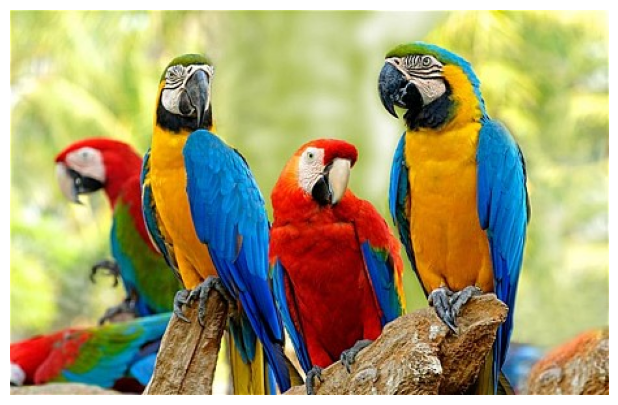

In [3]:
img = io.imread('assets/imagens_CG_UERJ/arara_full.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
_ = plt.axis('off')

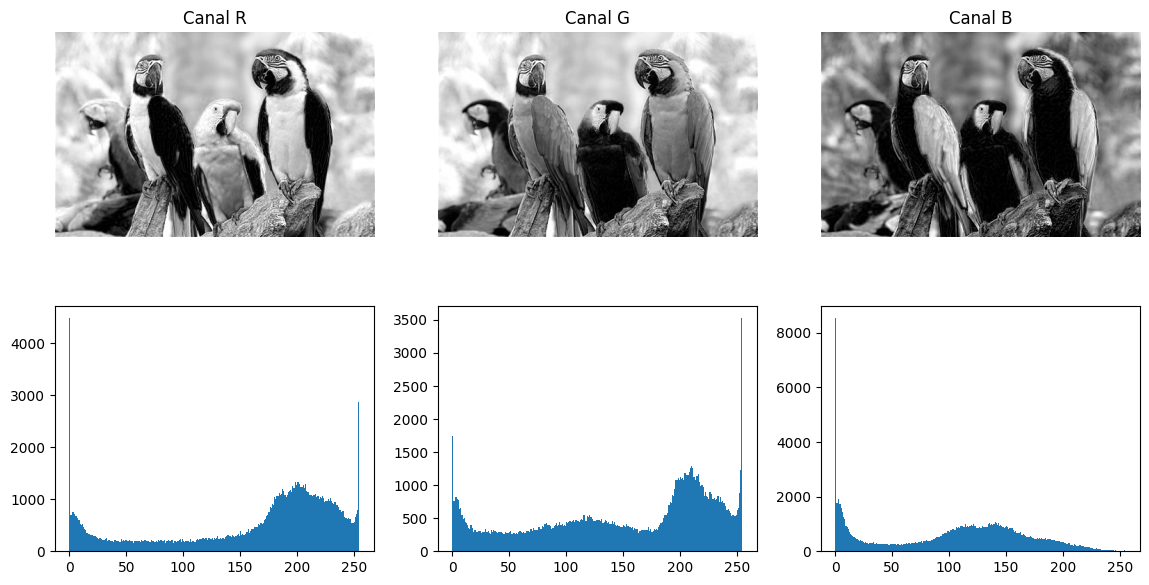

In [4]:
img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
plt.imshow(img_r, cmap='gray')
plt.axis('off')
plt.title('Canal R')

plt.subplot(2, 3, 4)
plt.hist(img_r.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(img_g, cmap='gray')
plt.axis('off')
plt.title('Canal G')

plt.subplot(2, 3, 5)
plt.hist(img_g.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.title('Canal B')

plt.subplot(2, 3, 6)
_ = plt.hist(img_b.flatten(), bins=255)


# **Exercício 2**
1 - Para a imagem usada no exercício anterior, calcule o negativo de cada canal individualmente e apresente numa mesma figura as imagens monocromáticas correspondentes (primeira linha) e os respectivos histogramas com bins de 0 a 255 (segunda linha).

2 - Combine (concatene) as os negativos dos canais da imagem original numa imagem tricromática e apresente a imagem colorida original e a negativa em uma única figura.

*Dica: para concatenar imagens monocromáticas use a função "np.stack".*

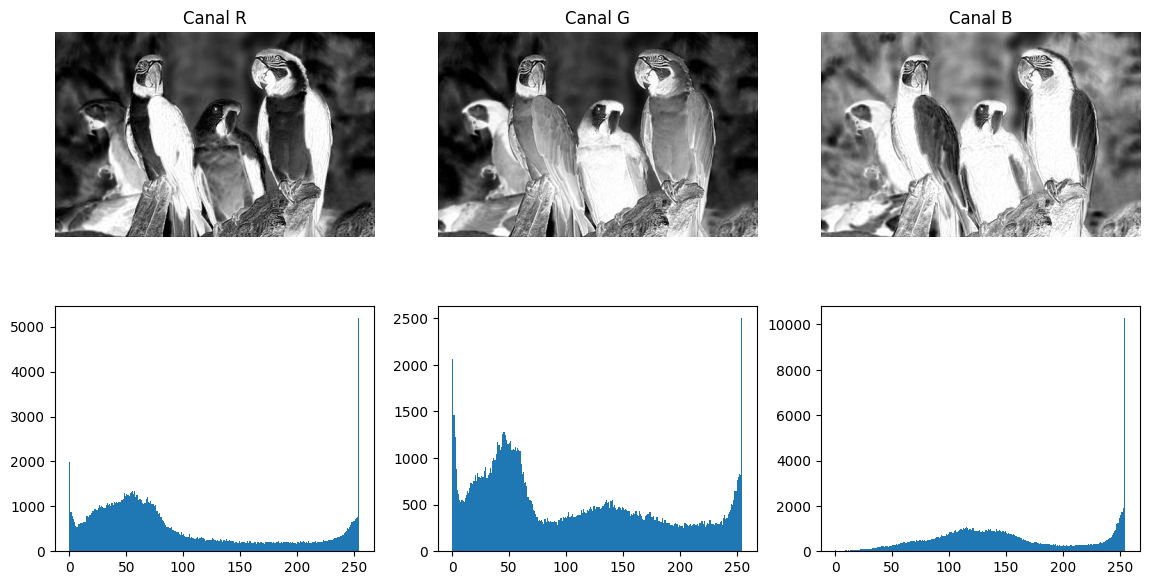

In [5]:
# Calculando os negativos dos canais e apresentando as imagens monocromáticas (de cada canal) e histogramas correspondentes
negativo_img_r, negativo_img_g, negativo_img_b = 255 - img_r, 255 - img_g, 255 - img_b

plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
plt.imshow(negativo_img_r, cmap='gray')
plt.axis('off')
plt.title('Canal R')

plt.subplot(2, 3, 4)
plt.hist(negativo_img_r.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(negativo_img_g, cmap='gray')
plt.axis('off')
plt.title('Canal G')

plt.subplot(2, 3, 5)
plt.hist(negativo_img_g.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(negativo_img_b, cmap='gray')
plt.axis('off')
plt.title('Canal B')

plt.subplot(2, 3, 6)
_ = plt.hist(negativo_img_b.flatten(), bins=255)

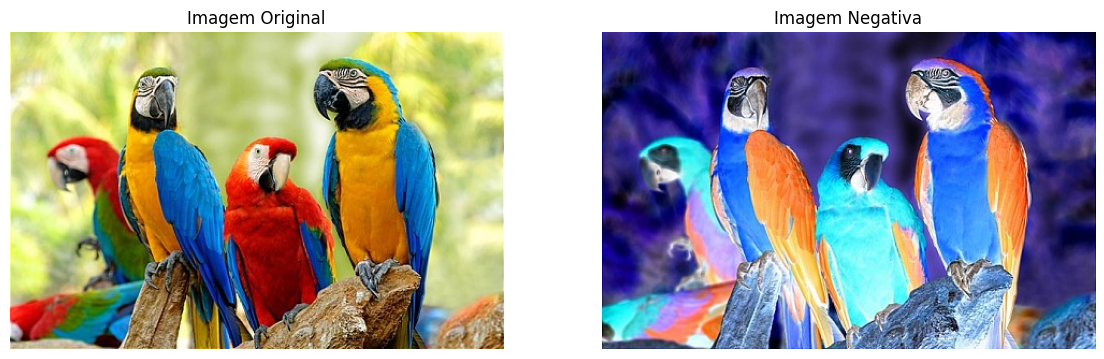

In [6]:
# Concatenando os negativos dos canais e apresentando a imagem colorida original e a negativa
img_negativo = np.stack((negativo_img_r, negativo_img_g, negativo_img_b), axis=-1)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_negativo)
plt.axis('off')
plt.title('Imagem Negativa')

plt.show()

# **Exercício 3**
0 - Utilize a imagem colorida leme.bmp, presente no repositório GitHub indicado na Introdução.

1 - Separe os canais da imagem e realize uma cooreção Gama, de forma a clarear as áreas escuras, sem saturar muito as intensidades dos pixels da áreas claras da imagem.

2 - Apresente em uma mesma figura os canais da imagem original (primeira linha) e os respectivos histogramas (segunda linha).

3 - Apresente em uma mesma figura os canais corrigidos (primeira linha) e os respectivos histogramas (segunda linha).

4 - Apresente em uma mesma figura a imagem colorida original e a imagem colorida produzida através da concatenação dos canais corrigidos.

*Dicas: para fazer a correção Gama, use a função "exposure.adjust_gamma"; para concatenar imagens monocromáticas use a função "np.stack".*

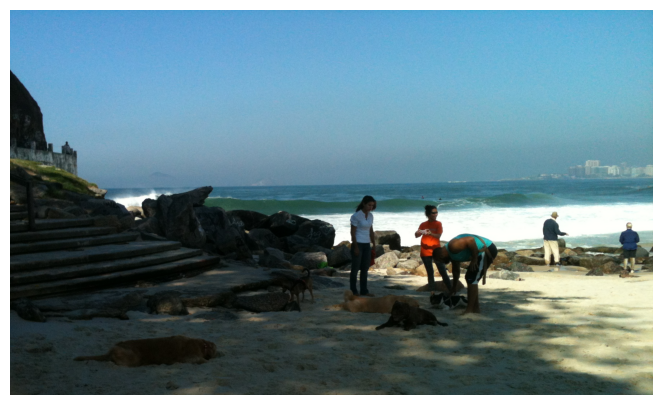

In [7]:
img = io.imread('assets/imagens_CG_UERJ/leme.bmp')
plt.figure(figsize=(10, 5))
plt.imshow(img)
_ = plt.axis('off')

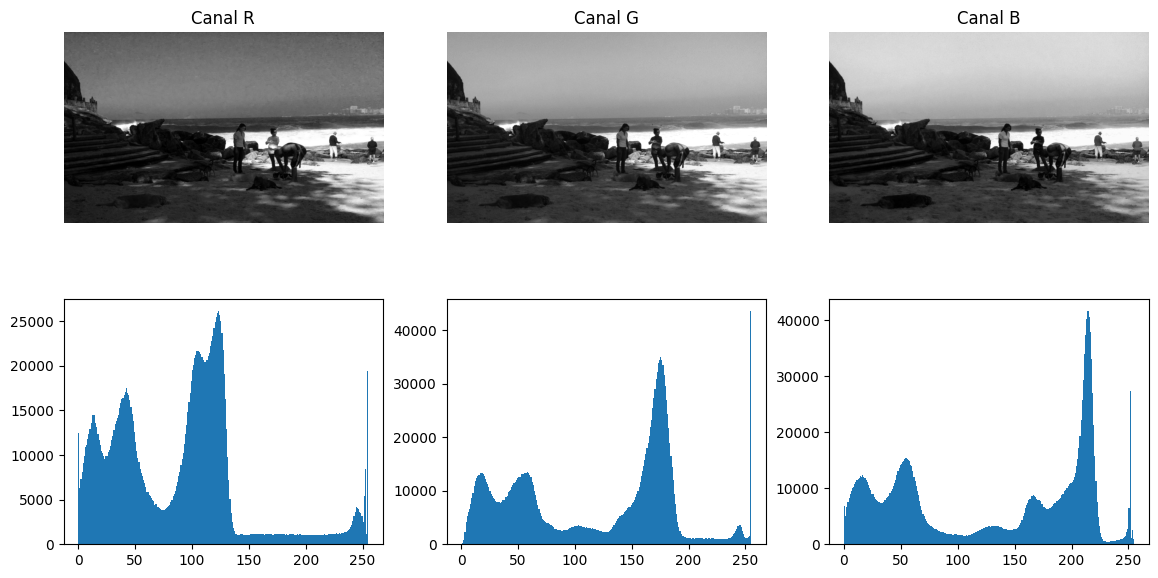

In [8]:
# Lendo a imagem e apresentando as imagens dos canais e respectivos histogramas
img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
plt.imshow(img_r, cmap='gray')
plt.axis('off')
plt.title('Canal R')

plt.subplot(2, 3, 4)
plt.hist(img_r.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(img_g, cmap='gray')
plt.axis('off')
plt.title('Canal G')

plt.subplot(2, 3, 5)
plt.hist(img_g.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.title('Canal B')

plt.subplot(2, 3, 6)
_ = plt.hist(img_b.flatten(), bins=255)

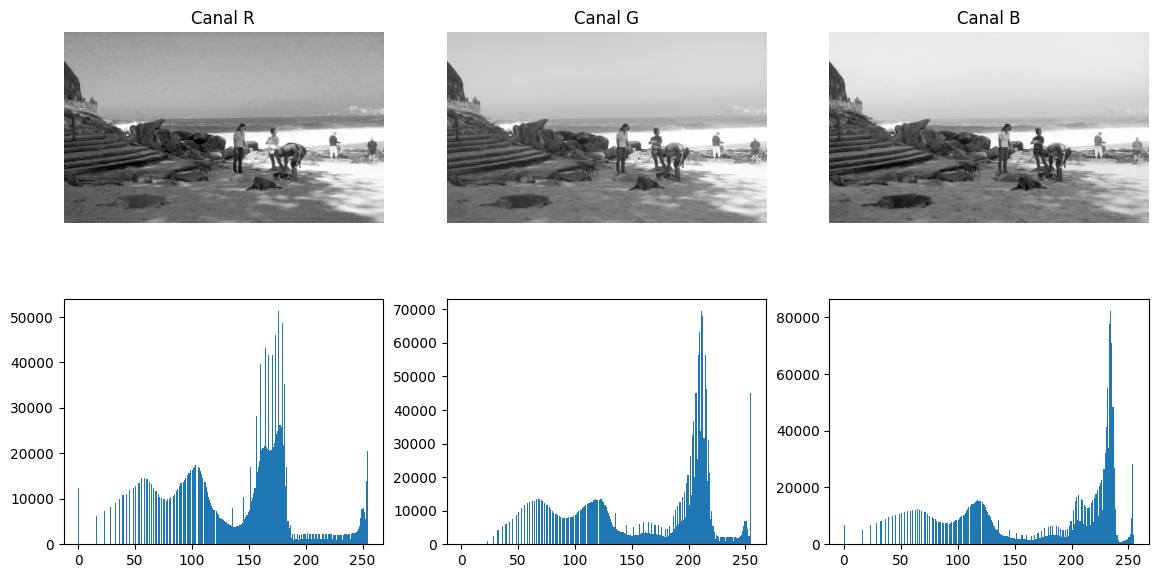

In [9]:
# Lendo a imagem e apresentando as imagens dos canais e respectivos histogramas
img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure(figsize=(14, 7))

img_r = exposure.adjust_gamma(img_r, 0.5)
img_g = exposure.adjust_gamma(img_g, 0.5)
img_b = exposure.adjust_gamma(img_b, 0.5)

plt.subplot(2, 3, 1)
plt.imshow(img_r, cmap='gray')
plt.axis('off')
plt.title('Canal R')

plt.subplot(2, 3, 4)
plt.hist(img_r.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(img_g, cmap='gray')
plt.axis('off')
plt.title('Canal G')

plt.subplot(2, 3, 5)
plt.hist(img_g.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.title('Canal B')

plt.subplot(2, 3, 6)
_ = plt.hist(img_b.flatten(), bins=255)

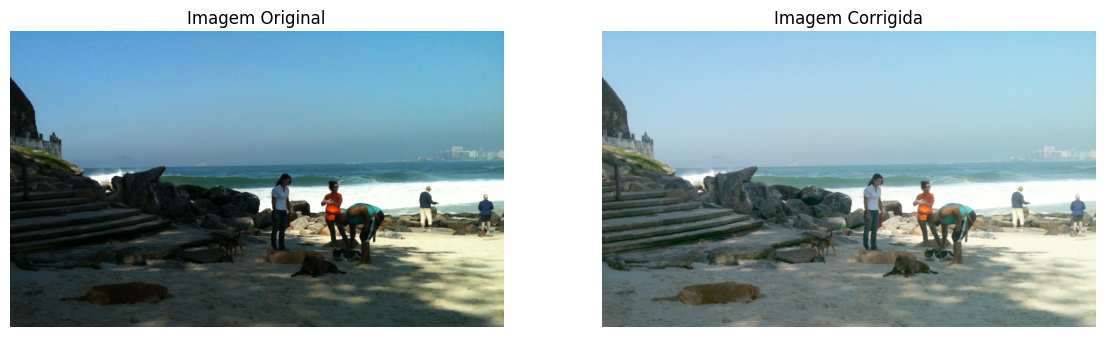

In [10]:
# Concatenando as correcoes gama dos canais e apresentando a imagem original e a corrigida
img_corrigida = np.stack((img_r, img_g, img_b), axis=-1)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_corrigida)
plt.axis('off')
plt.title('Imagem Corrigida')

plt.show()

# **Exercício 4**
0 - Utilize as imagens "moon" e "camera" do módulo "data" do Skimage e realize os procedimentos listados abaixo para rada uma delas.

1 - Realize o alargamento de contraste das imagens: saturando os pixels com
intensidades inferiores àquela que corresponde ao limite (percentil) de 2% (dos
pixels com intensidade mais baixa); e saturando os pixels com intensidades
superiores àquela que corresponde ao limite (percentil) de 98% (dos pixels com
intensidade mais alta).

2 - Realize a equalização de histograma das imagens.

3 - Apresente numa única figura para cada imagem: a imagem original e as imagens transformadas nos itens 1 e 2 (primeira linha); e os respectivos histogramas (segunda linha).

*Dicas: para calcular os percentis, use a função "np.percentile"; para fazer o alargamento de contraste, use a função "exposure.rescale_intensity"; para fazer a equalização de histogramas, use a função "exposure.equalize_hist".*

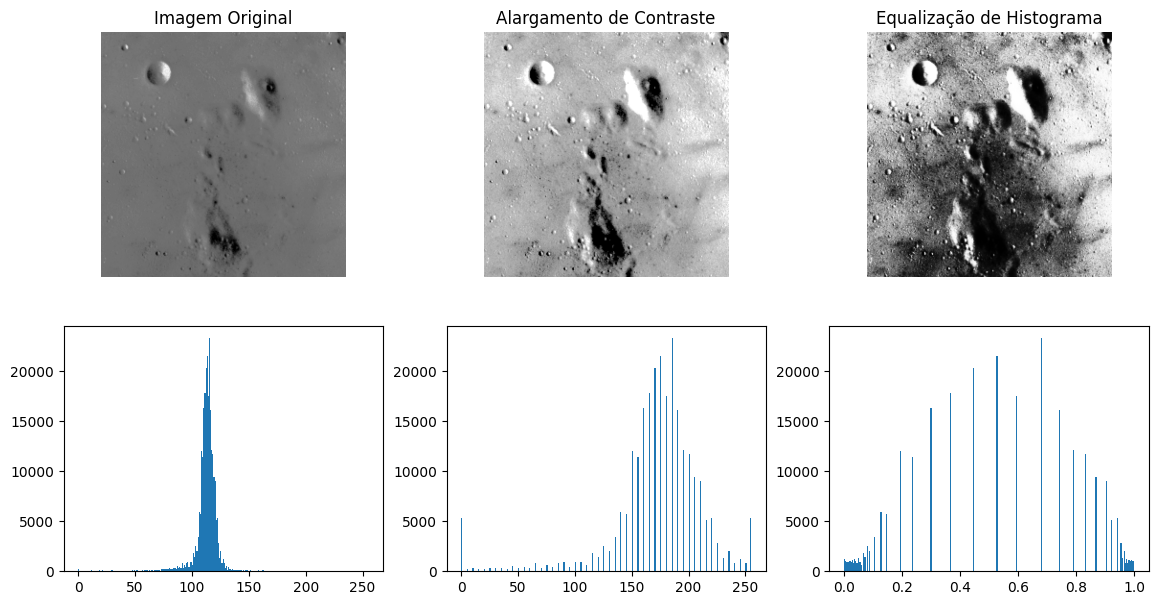

In [11]:
# Lendo a imagem 'moon', realizando o alargamento de contraste a equalização dos histogramas, e apresentando os histogramas

img = data.moon()
p2, p98 = np.percentile(img, (2, 98))

alargamento_contraste = exposure.rescale_intensity(img, in_range=(p2, p98))
equalizacao_histograma = exposure.equalize_hist(img)

plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(2, 3, 4)
plt.hist(img.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(alargamento_contraste, cmap='gray')
plt.axis('off')
plt.title('Alargamento de Contraste')

plt.subplot(2, 3, 5)
plt.hist(alargamento_contraste.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(equalizacao_histograma, cmap='gray')
plt.axis('off')
plt.title('Equalização de Histograma')

plt.subplot(2, 3, 6)
plt.hist(equalizacao_histograma.flatten(), bins=255)

_ = plt.show()

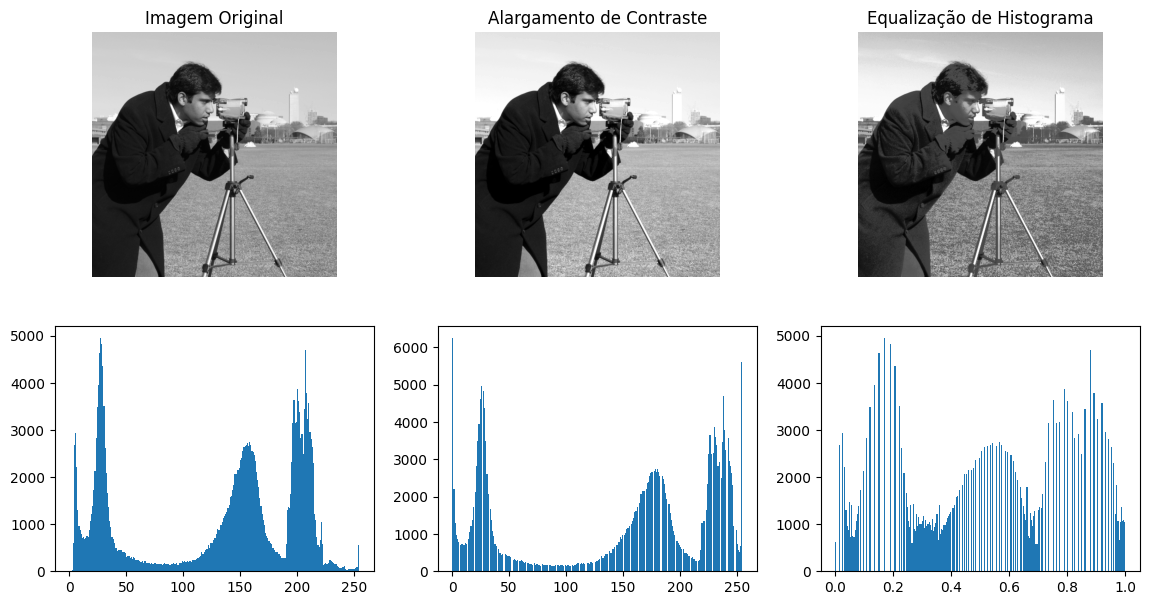

In [12]:
# Lendo a imagem 'camera', realizando o alargamento de contraste a equalização dos histogramas, e apresentando os histogramas

img = data.camera()
p2, p98 = np.percentile(img, (2, 98))

alargamento_contraste = exposure.rescale_intensity(img, in_range=(p2, p98))
equalizacao_histograma = exposure.equalize_hist(img)

plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(2, 3, 4)
plt.hist(img.flatten(), bins=255)

plt.subplot(2, 3, 2)
plt.imshow(alargamento_contraste, cmap='gray')
plt.axis('off')
plt.title('Alargamento de Contraste')

plt.subplot(2, 3, 5)
plt.hist(alargamento_contraste.flatten(), bins=255)

plt.subplot(2, 3, 3)
plt.imshow(equalizacao_histograma, cmap='gray')
plt.axis('off')
plt.title('Equalização de Histograma')

plt.subplot(2, 3, 6)
plt.hist(equalizacao_histograma.flatten(), bins=255)

_ = plt.show()

# **Exercício 5**
0 - Selecione duas imagens coloridas quaisquer (do repositório GitHub ou do seu Google Drive). Para este exercício é interessante que as imagens apresentem gamutes consideravelmente distintos.

1 - Realiza o pareamento de histograma entre as duas imagens: faça com que a primeira imagem tenha um histograma parecido com o da segunda, e vice-versa.

2 - Apresente em uma mesma figura as imagens coloridas originais (primeira linha) e as imagens transformadas (segunda linha).

*Dica: para fazer o pareamento de histogramas, use a função "exposure.match_histograms".*

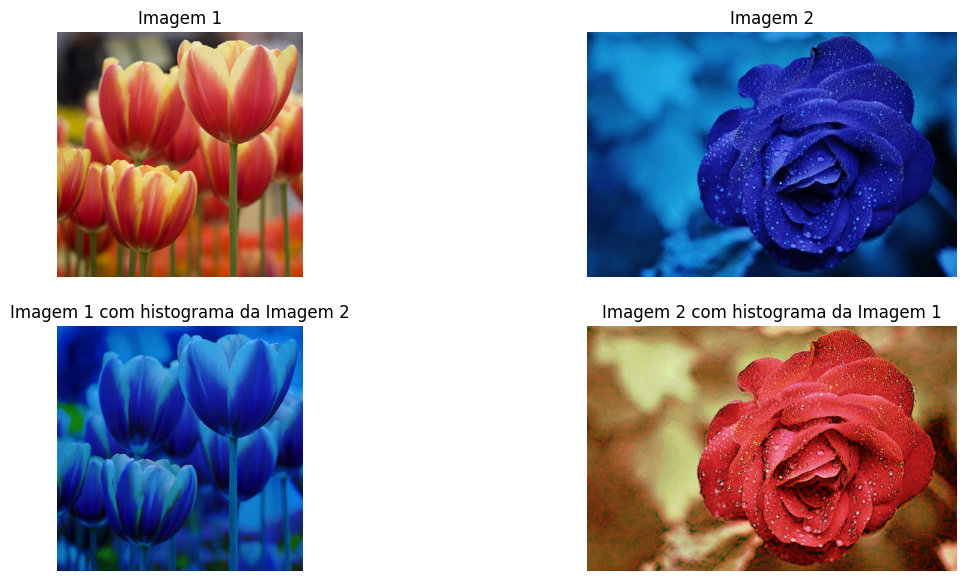

In [13]:
# Lendo as imagens, pareando histogramas e apresentando as imagens originais e com histogramas pareados
img1 = io.imread('assets/imagens_CG_UERJ/tulipas.jpg')
img2 = io.imread('assets/imagens_CG_UERJ/rosa_azul.jpg')

img1_pareada = exposure.match_histograms(img1, img2, channel_axis=2)
img2_pareada = exposure.match_histograms(img2, img1, channel_axis=2)

plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Imagem 1')

plt.subplot(2, 2, 3)
plt.imshow(img1_pareada)
plt.axis('off')
plt.title('Imagem 1 com histograma da Imagem 2')

plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Imagem 2')

plt.subplot(2, 2, 4)
plt.imshow(img2_pareada)
plt.axis('off')
_ = plt.title('Imagem 2 com histograma da Imagem 1')

# **Exercício 6**
0 - Selecione uma imagem monocromática qualquer. Observe que certas imagens monocromáticas, e.g., em formato PNG possuem três canais com intensidades idênticas. Neste caso deve-se extrair um dos canais para realizar o exercicio.

1 - Acrescente à imagem original ruído sal-e-pimenta, e apresente a imagem original e a imagem ruidosa em uma única figura.

2 - A aplique à imagem ruidosa os seguntes filtros: média; gaussiano; e mediana, e apresente numa mesma figura as imagens filtradas.

*Dicas: para introduzir ruído numa imagem, use a função "util.random_noise"; para fazer a filtragem com um filtro de média, use a função "ndimage.convolve"; para fazer a filtragem com um filtro Gaussiano, use a função "filters.gaussian"; para fazer a filtragem com um filtro de mediana, use a função "filters.rank.median".*

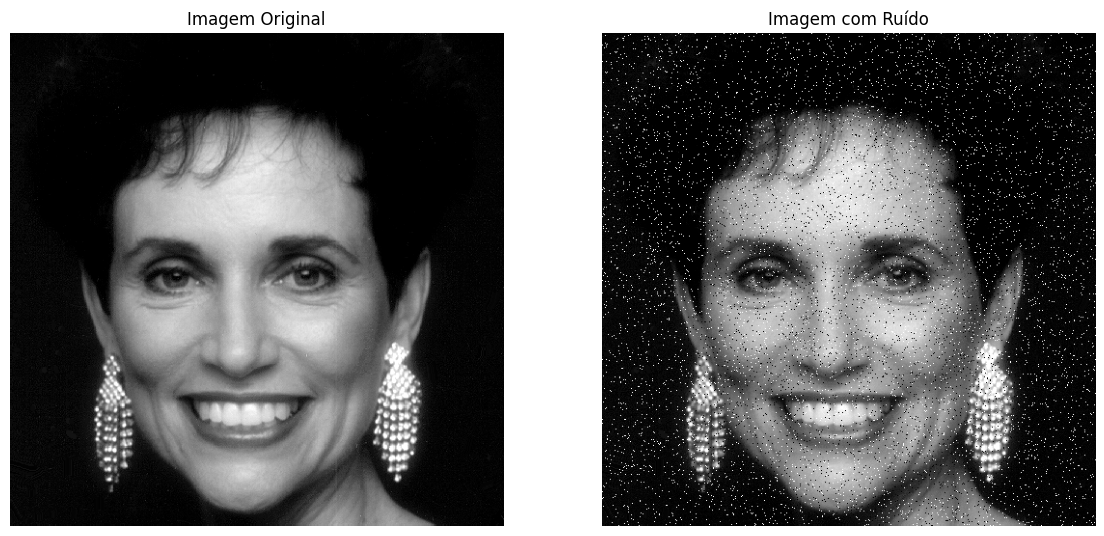

In [14]:
# Lendo a imagem e acrescentando ruído, e mostrando as duas imagens

img = io.imread('assets/imagens_CG_UERJ/woman.png')
img = img[:,:,0]

img_ruido = util.random_noise(img, mode='s&p', amount=0.05)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_ruido, cmap='gray')
plt.axis('off')
_ = plt.title('Imagem com Ruído')

/home/patrick/Documents/projects/computacao_grafica/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


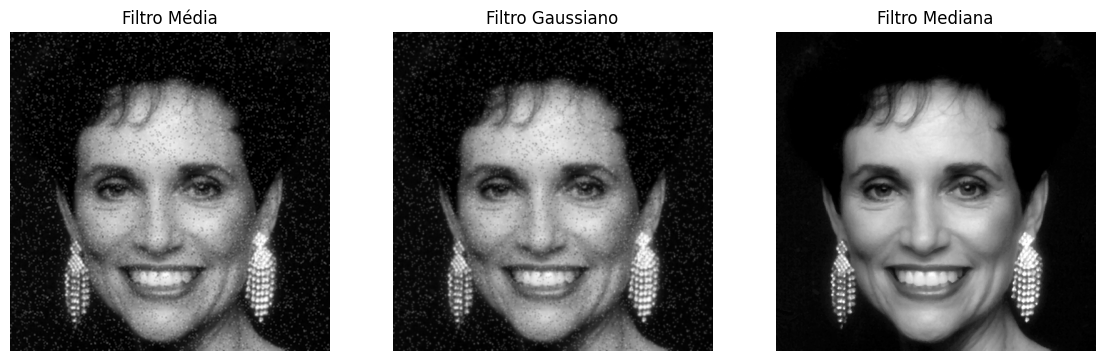

In [15]:
# Aplicando filtros e mostrando as imagens resultantes

filtro_media = ndimage.convolve(img_ruido, np.ones((3, 3))/9)
filtro_gaussiano = filters.gaussian(img_ruido, sigma=1)
filtro_mediana = filters.rank.median(img_ruido, np.ones((3, 3)))

plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(filtro_media, cmap='gray')
plt.axis('off')
plt.title('Filtro Média')

plt.subplot(1, 3, 2)
plt.imshow(filtro_gaussiano, cmap='gray')
plt.axis('off')
plt.title('Filtro Gaussiano')

plt.subplot(1, 3, 3)
plt.imshow(filtro_mediana, cmap='gray')
plt.axis('off')
_ = plt.title('Filtro Mediana')

# **Exercício 7**
1 - Selecione uma imagem colorida qualquer e transforme-a em uma imagem monocromática.

2 - Suavize a imagem monocromática com um filtro Gaussiano.

3 - Calcule a magnitude e o ângulo do gradiente para cada pixel de uma imagem qualquer, utilizando os filtros de Sobel.

4 - Limiarize a imagem da magnitude, para mostrar apenas pontos de borda “fortes”. Defina o limiar empiricamente.

5 - Crie uma imagem colorida, colorindo cada ponto de borda de acordo com a direção/ângulo do gradiente:

*	Vermelho (ângulos próximos da horizontal): menor que 15 e maior que 345 graus; e entre 165 e 195 graus;

*	Amarelo (ângulos próximos da vertical): entre 75 e 105 graus; e entre 255 e 285 graus;

*	Verde (ângulos na diagonal direita): ntre 15 e 75 graus; e entre 195 e 255 graus;

*	Azul (ângulos na diagonal esquerda): entre 105 e 165 graus; e entre 285 e 345 graus.

6 - Mostre imagem original; a imagem com a magnitude do gradiente limiarizada (binária); e a imagem colorida de acordo com os ângulos do gradiente.

*Dicas: para a suavização com filtro Gaussiano, use a função "filters.gaussian"; para fazer a filtragem com um filtro de derivação, use a função "ndimage.convolve"; para calcular amplitudes e ângulos do gradiente, use as funções "np.sqrt", "np.square", e "np.arctan2".*


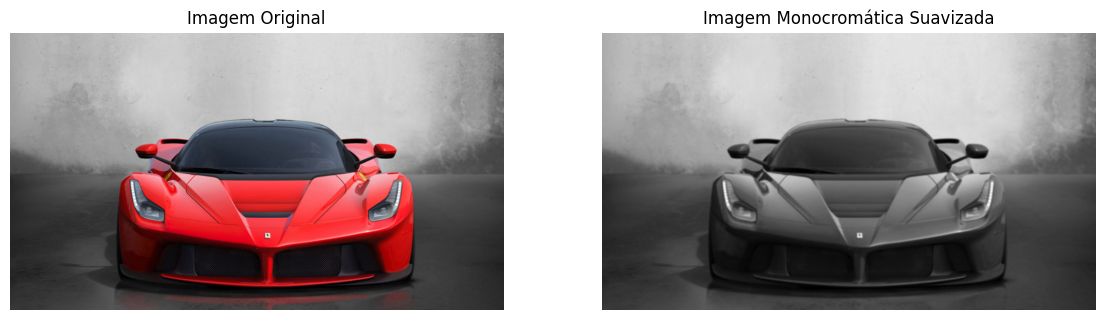

In [16]:
# Lendo a imagem e transformando em monocromática, suavizando a imagem monocromática, mostrando a imagem colorida e a monocromática suavizada

img = io.imread('assets/imagens_CG_UERJ/Ferrari.jpg')
img_cinza = color.rgb2gray(img)

img_suavizada = filters.gaussian(img_cinza, sigma=1)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(img_suavizada, cmap='gray')
plt.axis('off')
_ = plt.title('Imagem Monocromática Suavizada')


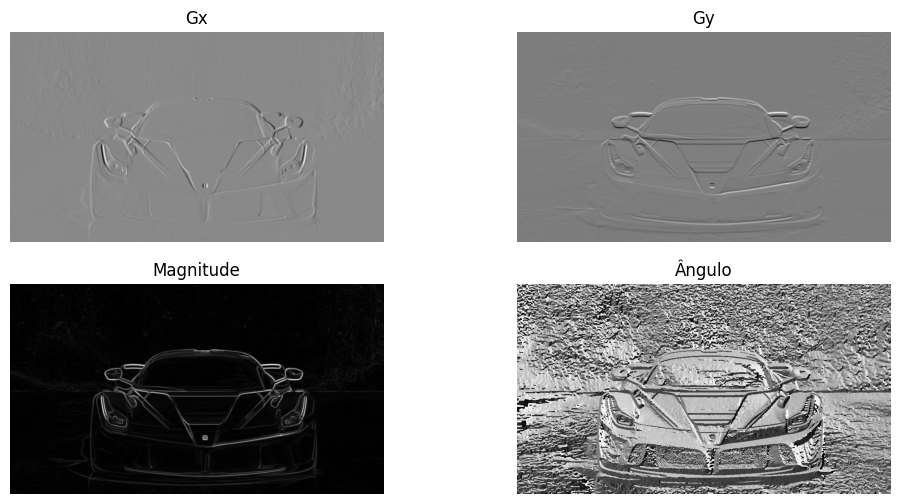

In [17]:
# Aplicando filtros de derivação (Sobel)

Gx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
Gy = Gx.T

sobel_x = ndimage.convolve(img_suavizada, Gx)
sobel_y = ndimage.convolve(img_suavizada, Gy)

magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

angulo = np.arctan2(sobel_y, sobel_x)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')
plt.title('Gx')

plt.subplot(2, 2, 2)
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')
plt.title('Gy')

plt.subplot(2, 2, 3)
plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.title('Magnitude')

plt.subplot(2, 2, 4)
plt.imshow(angulo, cmap='gray')
plt.axis('off')
_ = plt.title('Ângulo')

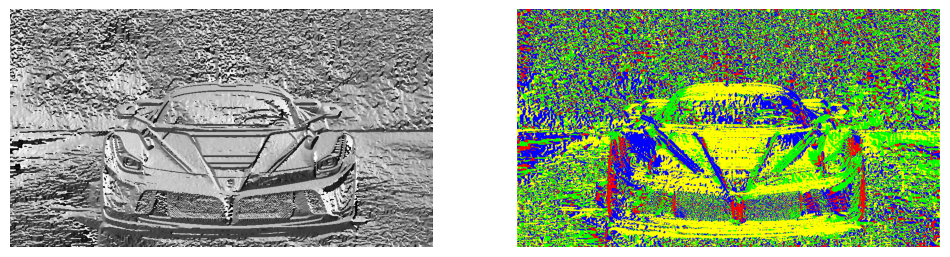

In [18]:
"""
Colorindo a imagem de ângulo por faixas

*	Vermelho (ângulos próximos da horizontal): menor que 15 e maior que 345 graus; e entre 165 e 195 graus;
*	Amarelo (ângulos próximos da vertical): entre 75 e 105 graus; e entre 255 e 285 graus;
*	Verde (ângulos na diagonal direita): entre 15 e 75 graus; e entre 195 e 255 graus;
*	Azul (ângulos na diagonal esquerda): entre 105 e 165 graus; e entre 285 e 345 graus.
"""

angulo_deg = np.rad2deg(angulo)
angulo_deg[angulo_deg < 0] += 180

angulo_colorido = np.zeros(angulo_deg.shape + (3,))
angulo_colorido[(angulo_deg < 15) | (angulo_deg > 345) | ((angulo_deg > 165) & (angulo_deg < 195))] = [1, 0, 0]
angulo_colorido[((angulo_deg > 75) & (angulo_deg < 105)) | ((angulo_deg > 255) & (angulo_deg < 285))] = [1, 1, 0]
angulo_colorido[((angulo_deg > 15) & (angulo_deg < 75)) | ((angulo_deg > 195) & (angulo_deg < 255))] = [0, 1, 0]
angulo_colorido[((angulo_deg > 105) & (angulo_deg < 165)) | ((angulo_deg > 285) & (angulo_deg < 345))] = [0, 0, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(angulo, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(angulo_colorido)
_ = plt.axis('off')

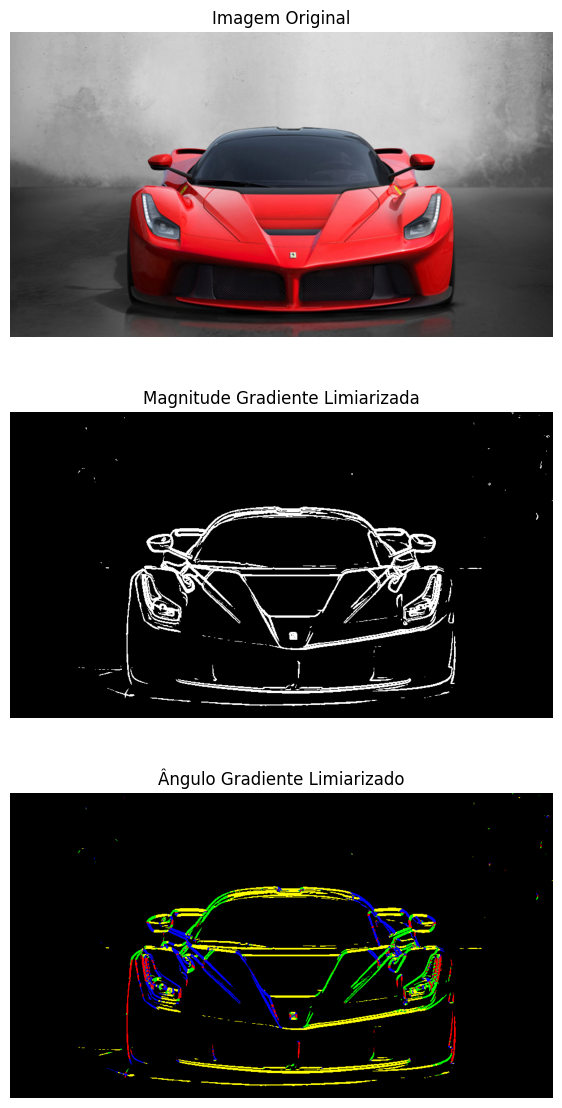

In [19]:
# Limiarizando as imagens

magnitude_limiarizada = np.zeros_like(magnitude)
magnitude_limiarizada[magnitude > 0.2] = 1

angulo_colorido_limiarizado = np.zeros_like(angulo_colorido)
angulo_colorido_limiarizado[magnitude > 0.2] = angulo_colorido[magnitude > 0.2]

plt.figure(figsize=(7, 14))

plt.subplot(3, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(3, 1, 2)
plt.imshow(magnitude_limiarizada, cmap='gray')
plt.axis('off')
plt.title('Magnitude Gradiente Limiarizada')

plt.subplot(3, 1, 3)
plt.imshow(angulo_colorido_limiarizado)
plt.axis('off')
_ = plt.title('Ângulo Gradiente Limiarizado')